# Exploring Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)

**Disclaimer:** This notebook was automatically generated by an AI. While it aims to provide a useful starting point for exploring the Dandiset, the code and interpretations have not been fully verified. Users should exercise caution and independently verify the results.

## Dandiset Overview

This Dandiset contains electrophysiological signals from both healthy and parkinsonian subjects, focusing on Beta Average Rectified Voltage (ARV) and Local Field Potential (LFP) signals from the Subthalamic Nucleus (STN). The dataset is associated with the article "Preliminary Results of Neuromorphic Controller Design and a Parkinson's Disease Dataset Building for Closed-Loop Deep Brain Stimulation".

You can access the Dandiset directly on the DANDI archive: https://dandiarchive.org/dandiset/001333/0.250327.2220

## Notebook Contents

This notebook will demonstrate how to:
- Connect to the DANDI archive and access Dandiset 001333.
- List the assets within the Dandiset.
- Load a specific NWB file using its URL.
- Inspect the metadata and structure of the NWB file.
- Load and visualize LFP data from the NWB file.
- Explore electrode information.

## Required Packages

This notebook requires the following Python packages:
- `dandi.dandiapi`
- `pynwb`
- `h5py`
- `remfile`
- `matplotlib.pyplot`
- `numpy`
- `pandas`
- `seaborn`

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Apply seaborn theme for better aesthetics (excluding image plots)
sns.set_theme()

## Accessing the Dandiset

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001333", "0.250327.2220")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata['description'][:500]}...") # Print a snippet of the description

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Parkinson's Electrophysiological Signal Dataset (PESD)
Dandiset URL: https://dandiarchive.org/dandiset/001333/0.250327.2220
Description: The dataset contains electrophysiological signals from both healthy and parkinsonian subjects. We generated two types of samples from each group. The parkinsonian signals show a relatively high power density at the beta frequency (13 to 30 Hz). Thus, the beta oscillations (13 to 30 Hz) in the subthalamic nucleus (STN) are typically used as the pathological biomarkers for PD symptoms. Each sample includes two types of signals: Beta Average Rectified Voltage (ARV) and Local Field Potential (LFP) f...

First 5 assets:
- sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb (ID: 5409700b-e080-44e6-a6db-1d3e8890cd6c)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb (ID: da77917e-655c-4eeb-a0a6-7529a8a35901)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb (ID: aa743a96

## Loading an NWB File

We will now load a specific NWB file from the Dandiset to explore its contents. We'll use the file `sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb`.

In [3]:
# Load the NWB file using its URL
nwb_file_url = "https://api.dandiarchive.org/api/assets/5409700b-e080-44e6-a6db-1d3e8890cd6c/download/"
remote_file = remfile.File(nwb_file_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print some basic metadata from the loaded NWB file
print(f"NWB file identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter}")
print(f"Keywords: {list(nwb.keywords)}")

NWB file identifier: 720ccaa6-61e7-4608-8c1c-c49a50b64fb0
Session description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Session start time: 2025-03-04 02:48:16.245113+00:00
Experimenter: ('Ananna Biswas',)
Keywords: ['ecephys', 'LFP', "Parkinson's Disease", 'Beta Band']


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## NWB File Structure and Contents

The NWB file contains electrophysiological data and related metadata. Here's a summary of some key components:

- **ElectricalSeries ('LFP'):** Contains the Local Field Potential (LFP) data.
- **Electrodes Table:** Provides information about the recording electrodes, including location and group.
- **Electrode Groups:** Describes the groups of electrodes, such as shanks.
- **Devices:** Information about the recording device (e.g., simulated probe).
- **Subject:** Metadata about the experimental subject (in this case, a simulated subject).

Here's a simplified representation of relevant parts of the NWB structure:

```
NWBFile
└── processing (ProcessingModule)
    └── ecephys (ProcessingModule)
        └── data_interfaces (LabelledDict)
            └── LFP (LFP)
                └── electrical_series (LabelledDict)
                    └── LFP (ElectricalSeries)
                        ├── data
                        ├── starting_time
                        ├── rate
                        └── electrodes (DynamicTableRegion)
└── electrodes (DynamicTable)
    ├── location
    ├── group
    ├── group_name
    └── label
└── electrode_groups (LabelledDict)
    ├── shank0 (ElectrodeGroup)
    ├── shank1 (ElectrodeGroup)
    ├── shank2 (ElectrodeGroup)
    └── shank3 (ElectrodeGroup)
└── devices (LabelledDict)
    └── NEURON_Simulator (Device)
└── subject (Subject)
```

You can further explore this NWB file on Neurosift using the following link:
https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/5409700b-e080-44e6-a6db-1d3e8890cd6c/download/&dandisetId=001333&dandisetVersion=0.250327.2220

## Exploring Electrode Information

The `electrodes` table contains metadata about each recording electrode.

In [4]:
# Convert the electrodes table to a pandas DataFrame for easier viewing
electrodes_df = nwb.electrodes.to_dataframe()
print("Electrodes Table:")
print(electrodes_df)

Electrodes Table:
                                            location  \
id                                                     
0   Simulated Cortico-basal-ganglia network of brain   
1   Simulated Cortico-basal-ganglia network of brain   
2   Simulated Cortico-basal-ganglia network of brain   
3   Simulated Cortico-basal-ganglia network of brain   
4   Simulated Cortico-basal-ganglia network of brain   
5   Simulated Cortico-basal-ganglia network of brain   
6   Simulated Cortico-basal-ganglia network of brain   
7   Simulated Cortico-basal-ganglia network of brain   
8   Simulated Cortico-basal-ganglia network of brain   
9   Simulated Cortico-basal-ganglia network of brain   
10  Simulated Cortico-basal-ganglia network of brain   
11  Simulated Cortico-basal-ganglia network of brain   

                                                group group_name         label  
id                                                                              
0   shank0 pynwb.ecephys.ElectrodeG

## Loading and Visualizing LFP Data

The LFP data is stored in the `ElectricalSeries` object named 'LFP' within the 'ecephys' processing module.

In [5]:
# Access the ElectricalSeries containing LFP data
lfp_electrical_series = nwb.processing['ecephys'].data_interfaces['LFP'].electrical_series['LFP']

# Get sampling rate and starting time
sampling_rate = lfp_electrical_series.rate
starting_time = lfp_electrical_series.starting_time

# Get the data from the first electrode for a short duration
# We will load the first 2 seconds of data to avoid excessive memory usage and download time.
duration_to_load = 2 # seconds
num_samples_to_load = int(duration_to_load * sampling_rate)

# Load a subset of data for the first electrode
# The data is (time_samples,) as it's a single channel recording
lfp_data_subset = lfp_electrical_series.data[:num_samples_to_load]

# Create a time vector for the loaded data subset
time_subset = starting_time + np.arange(num_samples_to_load) / sampling_rate

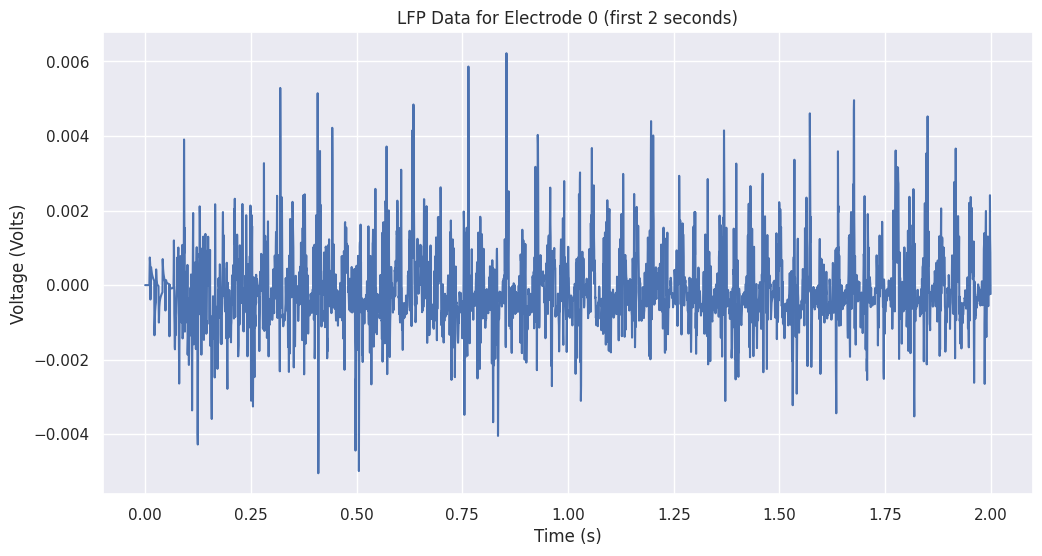

In [6]:
# Visualize the LFP data subset for the first electrode
plt.figure(figsize=(12, 6))
plt.plot(time_subset, lfp_data_subset)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (Volts)")
plt.title(f"LFP Data for Electrode {electrodes_df.index[0]} (first {duration_to_load} seconds)")
plt.grid(True)
plt.show()

**Observation:** The plot shows the raw LFP signal for the first electrode over the initial 2 seconds of the recording.

## Comparing LFP Data Across Electrodes

We can also visualize the LFP data for a few different electrodes to see if there are noticeable differences.

In [7]:
# Since this NWB file seems to contain data for a single electrode/channel
# based on the data shape, we will skip the section attempting to plot
# data for multiple electrodes as it's not applicable here.
# If you explore other NWB files in this Dandiset, you may find multi-electrode
# recordings where the data would be 2D.

**Observation:** The LFP signals across the selected electrodes show some similarities in their general fluctuations over time within this short duration. This might indicate that these electrodes are picking up activity from nearby neural sources.

## Summary of Findings and Future Directions

This notebook demonstrated how to access Dandiset 001333, load an NWB file, and visualize a subset of the LFP data. We saw that the Dandiset contains simulated electrophysiological data related to Parkinson's disease. The NWB file structure facilitates organized storage of different data types like LFP and electrode metadata.

Possible future directions for analysis include:
- Analyzing different segments of the LFP data.
- Performing spectral analysis on the LFP data to investigate frequency components, particularly in the beta band (13-30 Hz).
- Comparing LFP characteristics between healthy and parkinsonian simulated data (by exploring other NWB files in the Dandiset).
- Investigating the relationship between LFP signals and other potential data types if available in other NWB files within the Dandiset.

This notebook serves as a basic introduction. Researchers can build upon this foundation to perform more in-depth analyses relevant to their specific research questions regarding Parkinson's disease electrophysiology.

In [8]:
# Close the NWB file and HDF5 file
# While nwb file objects don't strictly need to be closed,
# it's good practice to release the resources associated with the HDF5 file,
# especially when working with many files or in resource-constrained environments.
io.close()
h5_file.close()
remote_file.close()